In [1]:
import osmnx as ox, pandas as pd, networkx as nx, time, geopandas as gpd, os, json
%matplotlib inline
ox.config(use_cache=True, log_file=True, log_console=True, log_filename='analyze_stats_every_us_city',
          data_folder='G:/Geoff/osmnx/cities-usa', cache_folder='G:/Geoff/osmnx/cache/cities-usa')

In [2]:
df = pd.read_csv('stats_every_city.csv', encoding='utf-8')
df.head()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,city,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,...,self_loop_proportion,state,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,time
0,40255362.0,40.255362,2.763230,0.035821,1.073845,Abbeville,0.043785,0.001999,268.0,0.013988,...,0.016018,AL,2279.823486,200.382357,91775.119705,458.0,2.598870,"{0: 0, 1: 86, 2: 0, 3: 239, 4: 28, 5: 1}","{0: 0.0, 1: 0.24293785310734464, 2: 0.0, 3: 0....",0.198139
1,65064935.0,65.064935,2.731586,0.028975,1.099873,Adamsville,0.042796,0.002045,461.0,0.007541,...,0.001382,AL,2375.155361,204.417102,154539.329173,756.0,2.706452,"{0: 0, 1: 159, 2: 0, 3: 332, 4: 123, 5: 5, 6: 1}","{0: 0.0, 1: 0.2564516129032258, 2: 0.0, 3: 0.5...",0.472866
2,9753292.0,9.753292,2.760518,0.021441,1.056957,Addison,0.064725,0.005696,75.0,0.046450,...,0.008197,AL,2881.893207,228.519886,28107.945963,123.0,2.543689,"{0: 0, 1: 28, 2: 0, 3: 66, 4: 9}","{0: 0.0, 1: 0.27184466019417475, 2: 0.0, 3: 0....",0.144620
3,1776164.0,1.776164,3.158854,0.040816,1.069141,Akron,0.080729,0.018392,46.0,0.085317,...,0.000000,AL,5439.459943,112.341546,9661.372929,86.0,2.812500,"{0: 0, 1: 18, 2: 0, 3: 22, 4: 24}","{0: 0.0, 1: 0.28125, 2: 0.0, 3: 0.34375, 4: 0....",0.044031
4,65079075.0,65.079075,2.713630,0.029176,1.090975,Alabaster,0.028714,0.001669,1174.0,0.002414,...,0.004440,AL,5257.144365,162.532110,342130.092407,2105.0,2.356792,"{0: 0, 1: 659, 2: 2, 3: 1036, 4: 132, 5: 3, 6: 1}","{0: 0.0, 1: 0.35951991271140205, 2: 0.00109110...",1.430981


## Inspect the stats

In [3]:
len(df)

19644

In [4]:
df.describe()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,edge_density_km,...,pagerank_max_node,pagerank_min,pagerank_min_node,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,time
count,1.964100e+04,19641.000000,19641.000000,19641.000000,19640.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,...,1.964100e+04,19641.000000,1.964100e+04,19641.000000,19641.000000,19641.000000,1.964100e+04,19641.000000,19641.000000,19641.000000
mean,1.670275e+07,16.702751,2.939596,0.032825,1.066565,0.047688,0.009956,323.833766,0.093362,12654.974001,...,3.320474e+08,0.005323,5.371973e+08,0.005431,6527.858626,162.408102,8.609621e+04,557.519678,2.851321,0.315136
std,1.074987e+08,107.498683,0.297472,0.141141,0.159481,0.040977,0.018016,1266.252746,0.136189,6705.181552,...,6.623097e+08,0.017803,9.422344e+08,0.015030,3434.689016,81.034774,3.310488e+05,2208.179747,0.282447,1.999200
min,3.903300e+04,0.039033,0.400000,0.000220,1.000000,0.000000,0.000000,0.000000,0.000068,5.602403,...,2.528282e+07,0.000002,3.625030e+05,0.000000,2.801202,25.821833,2.582183e+01,1.000000,1.000000,0.005993
25%,1.615906e+06,1.615906,2.769608,0.025074,1.034368,0.025926,0.002396,37.000000,0.018287,7771.499119,...,1.128357e+08,0.000547,1.192871e+08,0.000000,4006.758747,123.978936,8.892022e+03,61.000000,2.659898,0.032071
50%,3.918107e+06,3.918107,2.952785,0.029443,1.055267,0.040181,0.004927,83.000000,0.052474,11814.329656,...,1.642341e+08,0.001794,1.810832e+08,0.000000,6109.256439,145.479249,2.100479e+04,140.000000,2.851852,0.067860
75%,1.158637e+07,11.586369,3.146242,0.033951,1.082259,0.058511,0.010528,234.000000,0.117647,16583.405166,...,2.120218e+08,0.004975,2.353952e+08,0.006623,8581.340691,175.637691,6.126310e+04,398.000000,3.049663,0.205166
max,7.434258e+09,7434.257623,3.734722,9.357215,20.452465,1.000000,0.524196,62996.000000,2.666667,58603.420737,...,4.506679e+09,0.500000,4.502370e+09,1.000000,29301.710368,3036.956693,1.534801e+07,107393.000000,4.000000,204.592024


In [5]:
df[['state', 'city', 'time', 'k_avg', 'n', 'm', 'circuity_avg']].sort_values(by='m', ascending=False).head()

,state,city,time,k_avg,n,m,circuity_avg
17191,TX,Houston,204.592024,4.893837,71993.0,176161.0,1.054423
1437,CA,Los Angeles,67.755900,5.533231,52210.0,144445.0,1.048552
11846,NY,New York,47.588840,5.252010,54236.0,142424.0,1.021721
658,AZ,Phoenix,59.881315,5.172221,46237.0,119574.0,1.075627
17666,TX,San Antonio,45.030600,5.171496,37272.0,96376.0,1.058283


In [6]:
df.groupby('state').median().describe()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,edge_density_km,...,pagerank_max_node,pagerank_min,pagerank_min_node,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,time
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,1.657391e+07,16.573913,2.925059,0.029878,1.060731,0.042414,0.004730,402.578431,0.048121,11692.299113,...,1.496950e+08,0.001746,1.521983e+08,0.002249,6092.454577,150.069738,9.602515e+04,692.558824,2.822541,0.395783
std,2.989866e+07,29.898662,0.138724,0.003215,0.014372,0.007252,0.001985,1324.301810,0.031421,3998.437500,...,8.268978e+07,0.001304,8.363940e+07,0.003754,2164.362681,23.868823,2.832585e+05,2306.268370,0.171668,1.430218
min,1.070451e+06,1.070451,2.673759,0.023035,1.035426,0.028034,0.001803,26.000000,0.000549,1052.176568,...,3.877861e+07,0.000015,3.955119e+07,0.000000,526.088284,110.345932,9.254807e+03,47.000000,2.419539,0.029021
25%,2.782724e+06,2.782724,2.819577,0.027646,1.049946,0.037638,0.003377,63.000000,0.028306,8767.069848,...,1.007524e+08,0.000925,1.034453e+08,0.000000,4621.954102,131.433065,1.526220e+04,106.500000,2.708833,0.057434
50%,5.069211e+06,5.069211,2.909800,0.030193,1.060012,0.041096,0.004701,87.000000,0.048650,12099.179959,...,1.466061e+08,0.001646,1.469866e+08,0.000000,6247.199012,145.176706,2.367906e+04,146.000000,2.799242,0.068367
75%,1.219045e+07,12.190452,2.990410,0.031832,1.070577,0.045286,0.005846,141.000000,0.062669,14215.053001,...,1.860464e+08,0.002167,1.898499e+08,0.003171,7272.404097,166.093533,4.137854e+04,240.500000,2.915817,0.137592
max,1.583650e+08,158.364992,3.238562,0.040127,1.102221,0.071002,0.009912,9330.000000,0.120513,21355.016667,...,5.816619e+08,0.005271,5.824309e+08,0.020284,12561.028196,223.502923,1.989227e+06,16275.000000,3.262517,10.149165


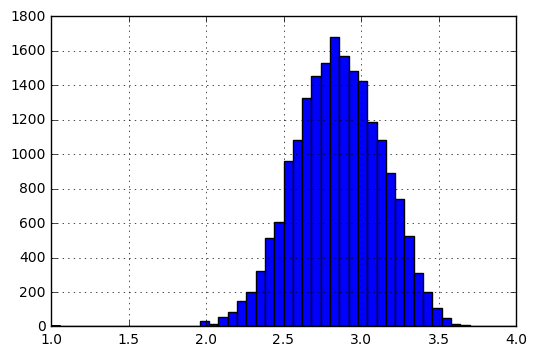

In [7]:
df['streets_per_node_avg'].hist(bins=50)

In [8]:
df.groupby('state')['streets_per_node_avg'].median().sort_values()

state
HI    2.419539
AK    2.434783
VT    2.554217
VA    2.629213
AL    2.640000
NC    2.645752
WV    2.666667
ME    2.668168
KY    2.678707
NH    2.686885
OR    2.694444
CT    2.702813
UT    2.708333
TN    2.709334
CA    2.739154
WA    2.750000
MS    2.750000
NY    2.753012
MA    2.763441
AZ    2.770642
NV    2.770710
AR    2.776573
GA    2.776699
MD    2.789474
LA    2.793978
DE    2.799242
OH    2.800000
SC    2.809384
WI    2.812500
RI    2.859369
FL    2.865261
MN    2.866667
PA    2.867925
NJ    2.881188
CO    2.883019
MO    2.887218
MI    2.897590
ID    2.914474
TX    2.917160
WY    2.923527
IL    2.925926
NM    2.929577
IN    2.929936
IA    3.018031
OK    3.034437
ND    3.068966
MT    3.105263
SD    3.121951
KS    3.139698
NE    3.156250
DC    3.262517
Name: streets_per_node_avg, dtype: float64

In [9]:
# node and edge density per km are hard to interpret when using municipal boundaries
# as municipal boundaries vary greatly in their extents around the built-up area
df.groupby('state')['node_density_km'].median().sort_values()

state
AK     1.920723
ME    10.467436
AL    12.959058
HI    13.061057
NH    15.344907
AZ    15.825677
NV    16.438808
UT    16.603729
TN    17.752386
MS    18.909353
GA    18.963529
AR    20.055676
LA    21.827145
SC    22.546346
WI    22.590159
MN    23.773704
NM    25.382946
NC    25.646581
VT    26.034635
MI    26.351897
WY    27.143199
NY    27.705126
TX    28.531212
IA    28.667988
DE    31.352728
OH    31.790388
FL    32.536954
KY    33.001647
OK    33.319636
CT    34.117726
VA    34.719235
CO    35.266550
IL    35.292710
MO    36.370271
SD    36.641294
MD    37.200225
WA    37.496489
WV    38.238888
MA    39.161019
ND    39.887588
ID    42.473318
IN    42.488884
CA    43.557170
PA    43.562195
MT    44.825542
OR    47.381462
KS    49.874815
NE    52.015208
NJ    54.347639
DC    63.309447
RI    66.967237
Name: node_density_km, dtype: float64

In [10]:
df[df['state']=='AZ'][['node_density_km', 'city']].sort_values(by='node_density_km')

,node_density_km,city
631,1.295691,Gila Bend
686,1.354147,Tusayan
677,2.670593,Star Valley
690,2.968726,Williams
687,3.289450,Wellton
608,3.387927,Buckeye
680,3.629011,Taylor
652,3.760667,Page
626,4.004540,Eloy
654,4.251629,Parker
